# Lista 03 - Estrutura de Dados
##### Nome: Antonio Elimar Ximenes Oliveira
##### Matrícula: 584261

# Questão 1

In [2]:
import pandas as pd

### a) Ler o dataset fakeTelegram.BR_2022.csv

In [2]:
df = pd.read_csv(r'D:\10 - Materiais e Atividades disciplinas MDCC\1 - Atividades MDCC\Estrutura de Dados\fakeTelegram.BR_2022.csv')

In [3]:
# Exibe as 5 primeiras linhas
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [4]:
len(df)

557586

### b) Remova os trava-zaps.

Como temos uma coluna chamada `trava_zap`, que é do tipo booleano, vamos, a princípio, verificar a quantidaade de "trava zap" e remover essas linhas.

In [5]:
# Contar a quantidade de True e False na coluna 'trava_zap'
contagem_trava_zap = df['trava_zap'].value_counts()

# Exibir o resultado
contagem_trava_zap

trava_zap
False    557570
True         16
Name: count, dtype: int64

In [6]:
# Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False] # Mantém apenas as linhas onde 'trava_zap' é False (ou seja, remove os "trava-zaps")
df = df[df['trava_zap'] == False]

Também vou remover aquela mensagem automática relacionada ao TSE

In [7]:
df = df[df['text_content_anonymous'] != 
    "This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE)."]

### c) Remover textos com menos de 5 palavras.

In [8]:
# Verifica se é um STR (Nan são removidos) e se tem mais de 5 palavras
df = df[df['text_content_anonymous'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 5)]

In [9]:
print("Quantidade restante após remoção: ", len(df))

Quantidade restante após remoção:  321864


In [10]:
# Quantos valores distintos existem na coluna "usuario"
num_distintos = df["id_member_anonymous"].nunique()
print("Quantidade de valores distintos:", num_distintos)

Quantidade de valores distintos: 10677


### Analisando mensagens semelhantes

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Vetorização TF-IDF com stopwords em português
stopwords_pt = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stopwords_pt)

# Preencher textos vazios
df['text_content_anonymous'] = df['text_content_anonymous'].fillna('')

# Aplicar TF-IDF
X_tfidf = vectorizer.fit_transform(df['text_content_anonymous'])

# Agrupamento com DBSCAN baseado em similaridade de texto
# DBSCAN exige uma distância: usamos (1 - similaridade do cosseno)
db = DBSCAN(eps=0.1, min_samples=2, metric='cosine')
clusters = db.fit_predict(X_tfidf)

df['cluster_mensagem'] = clusters

# Criar coluna de quantidade de compartilhamentos (mensagens semelhantes no mesmo grupo)
df['qtd_compartilhamentos'] = df.groupby('cluster_mensagem')['cluster_mensagem'].transform('count')

# Converter data da mensagem para datetime
df['date_message'] = pd.to_datetime(df['date_message'], errors='coerce')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elimar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Como o cluster -1 indica mensagens únicas o qtd_compartilhamentos colocamos como 1.

In [ ]:
# Se cluster_mensagem == -1, define qtd_compartilhamentos = 1
df.loc[df["cluster_mensagem"] == -1, "qtd_compartilhamentos"] = 1

In [ ]:
df[["text_content_anonymous", "cluster_mensagem", "qtd_compartilhamentos"]].head(9)

,text_content_anonymous,cluster_mensagem,qtd_compartilhamentos
0,Então é Fato Renato o áudio que eu ouvi no wha...,-1,1
1,"Saiu no YouTube do presidente a 8 horas atrás,...",-1,1
2,"É isso, nossa parte já foi quase toda feita. N...",-1,1
3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,-1,1
4,Kķkkkkk to rindo até agora....Quem disse q ia ...,-1,1
5,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,0,91
6,O Deputado Federal pelo NOVO e que foi candida...,1,6
7,"Saiam desse grupo amigos bolsonaristas, urgent...",2,20
8,Gazprom da Rússia: Retomamos o fornecimento de...,-1,1


Como podemos ver abaixo, com o print do cluster 2, mensagens que seriam consideradas diferentes em uma comparação simples de igualdade agora, pelo identificador do cluster, podem ser reconhecidas como semelhantes.

In [ ]:
mensagens_cluster_2 = df[df["cluster_mensagem"] == 2]["text_content_anonymous"]

mensagens_semelhantes = mensagens_cluster_2.unique()

print(f"\n🔹 Mensagens semelhantes no cluster 2 ({len(mensagens_cluster_2)} mensagens total): {len(mensagens_semelhantes)} únicas")
for msg in mensagens_semelhantes:
    print("-", msg)


🔹 Mensagens semelhantes no cluster 2 (20 mensagens total): 6 únicas
- Saiam desse grupo amigos bolsonaristas, urgente e tirem seus companheiros, esse grupo é de lulistas pegando os dados de vcs e votarem no lugar de vcs, não acreditam em nada que eles postando é tudo fake, esse grupo é fake, avisem a todos e saiam daqui e avisem o máximo de pessoas pra não mandarem comprovante da votação  pq falei com CARLA ZAMBELLE E ELA DISSE QUE ESSES GRUPOS FORAM FEITOS PRA NOS DIVIDIR E PEGAR DADOS FOS ELEITORES DO BOLSONARO, POR FAVOR PARRM AMIGOS, NÃO PREJUDIQUEM NOSSO CAPITÃO, NÃO DRIXEM ELEA NOS DERROTAREM, NÃO ACREDITEM EM MENTIRAS E FAKE NEWS! Grupo se fingindo de bolsonaristas, avisem seus familiares para não entrarem e não mandarem comprovante nenhum, é tudo mentira esses links de pedir comprovante, são petistas pegando os nossos dados. Socorroooooo não façam isso, avisem amigos pra ter cuidado com fakes e links desses grupos, estou entrando nos grupos avisando, me ajudem!! ELES ESTAO NES

Criando as colunas is_viral e is_misinfo, para indicar se a mensagem é viral e se tem desinformação

In [ ]:
# Calcula o limite
limite_viral = df["qtd_compartilhamentos"].quantile(0.90)

# Cria coluna para viralidade
df["is_viral"] = df["qtd_compartilhamentos"].fillna(0) > limite_viral

# Cria coluna para desinformação (score >= 0.7)
df["is_misinfo"] = df["score_misinformation"].fillna(0) >= 0.7

# Conferindo
print("Limite usado para viralidade:", limite_viral)
df[["qtd_compartilhamentos", "score_misinformation", "is_viral", "is_misinfo"]].head(10)

Limite usado para viralidade: 31.0


,qtd_compartilhamentos,score_misinformation,is_viral,is_misinfo
0,1,NaN,False,False
1,1,NaN,False,False
2,1,0.157242,False,False
3,1,NaN,False,False
4,1,0.197813,False,False
5,91,0.974258,True,True
6,6,0.035876,False,False
7,20,0.934309,False,True
8,1,NaN,False,False
9,20,0.999971,False,True


In [ ]:
# Contagem de mensagens virais
print("🔹 Quantidade de mensagens virais vs não virais:")
print(df["is_viral"].value_counts())

# Contagem de mensagens de desinformação
print("\n🔹 Quantidade de mensagens com desinformação vs sem:")
print(df["is_misinfo"].value_counts())

🔹 Quantidade de mensagens virais vs não virais:
is_viral
False    290268
True      31596
Name: count, dtype: int64

🔹 Quantidade de mensagens com desinformação vs sem:
is_misinfo
False    297110
True      24754
Name: count, dtype: int64


In [ ]:
# Salvando o DataFrame após o tratamento, contendo as colunas:
# - cluster_mensagem: identificador do cluster da mensagem
# - is_viral: indicador se a mensagem foi classificada como viral
# - is_desinformacao: indicador se a mensagem contém desinformação
df.to_csv("mensagens_cluster_90_viral_desinfo.csv", index=False)

### d) Monte os grafos solicitados a seguir.

In [2]:
import pandas as pd

df_similaridade = pd.read_csv(r'D:\10 - Materiais e Atividades disciplinas MDCC\1 - Atividades MDCC\Estrutura de Dados\mensagens_cluster_90_viral_desinfo.csv', parse_dates=["date_message"])

In [3]:
df_similaridade[:2]

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,score_misinformation,id_message,message_type,messenger,media_name,media_md5,cluster_mensagem,qtd_compartilhamentos,is_viral,is_misinfo
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,NaN,16385,Texto,telegram,NaN,NaN,-1,1,False,False
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,NaN,16386,Texto,telegram,NaN,NaN,-1,1,False,False


Utilizando as ferramentas:

- 1. NetworkX (https://networkx.org/)
- 2. Gephi (http://gephi.org)

#### Criando os grafos com a ferramenta **NetworkX**

In [ ]:
!pip install python-louvain

In [13]:
!pip install networkx


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Elimar\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
from collections import defaultdict
import community.community_louvain as community_louvain
from networkx.algorithms.community import quality as q

In [6]:
def export_gexf(G, path):
    """Exporta grafo para Gephi (.gexf)."""
    nx.write_gexf(G, path)
    print(f"Exportado {path}")

def communities_louvain(G, weight='weight'):
    """Roda Louvain e retorna partição dict e lista de comunidades."""
    partition = community_louvain.best_partition(G.to_undirected(), weight=weight)
    # converter para lista de conjuntos
    inv = defaultdict(set)
    for node, com in partition.items():
        inv[com].add(node)
    communities = list(inv.values())
    return partition, communities

def evaluate_partition(G, communities):
    """
    Calcula métricas de qualidade de partição:
    - modularity
    - coverage
    - performance
    Usando as funções do módulo 'quality' do NetworkX.
    """
    G_undirected = G.to_undirected()  # Métricas usam grafos não direcionados
    resultados = {}

    # Modularity
    try:
        resultados["modularity_nx"] = q.modularity(G_undirected, communities, weight="weight")
    except Exception as e:
        print(f"[!] Erro ao calcular modularity: {e}")
        resultados["modularity_nx"] = None

    # Coverage e Performance (retornam juntos)
    try:
        coverage, performance = q.partition_quality(G_undirected, communities)
        resultados["coverage"] = coverage
        resultados["performance"] = performance
    except Exception as e:
        print(f"[!] Erro ao calcular coverage/performance: {e}")
        resultados["coverage"] = None
        resultados["performance"] = None

    return resultados

In [7]:
def build_stn(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", nome="STN"):
    G = nx.DiGraph()
    for cluster, sub in df.groupby(cluster_col):
        usuarios = sub[user_col].dropna().unique().tolist()
        # todos pares ordenados (direcionado), ou você pode manter apenas undirected/projected
        for u1, u2 in combinations(usuarios, 2):
            # direção dupla para manter coerência (pode ser convertida em não-dirigido)
            if G.has_edge(u1, u2):
                G[u1][u2]['weight'] += 1
            else:
                G.add_edge(u1, u2, weight=1)
            if G.has_edge(u2, u1):
                G[u2][u1]['weight'] += 1
            else:
                G.add_edge(u2, u1, weight=1)
    print(f"{nome}: nodes={G.number_of_nodes()}, edges={G.number_of_edges()}")
    return G

In [9]:
def build_rrn(df, delta_seconds=3600, cluster_col="cluster_mensagem",
              time_col="date_message", user_col="id_member_anonymous", nome="RRN"):
    G = nx.DiGraph()
    # garantir ordenação por cluster e tempo
    df_sorted = df.dropna(subset=[cluster_col, time_col, user_col]).sort_values(time_col)
    for cluster, sub in df_sorted.groupby(cluster_col):
        # lista de (time, user)
        events = sub[[time_col, user_col]].dropna().values
        # events already sorted by time due to groupby from sorted df
        for i in range(len(events)):
            ti, ui = events[i]
            for j in range(i+1, len(events)):
                tj, uj = events[j]
                if (tj - ti).total_seconds() <= delta_seconds:
                    # cria aresta ui -> uj
                    if ui == uj:
                        continue
                    if G.has_edge(ui, uj):
                        G[ui][uj]['weight'] += 1
                    else:
                        G.add_edge(ui, uj, weight=1)
                else:
                    # eventos seguintes fora da janela -> break (assumindo ordenado)
                    break
    print(f"{nome}: nodes={G.number_of_nodes()}, edges={G.number_of_edges()}")
    return G

In [11]:
def combine_graphs(G_rrn, G_stn, alpha=1.0, beta=1.0, mode="sum"):
    G = nx.DiGraph()
    nodes = set(G_rrn.nodes()) | set(G_stn.nodes())
    G.add_nodes_from(nodes)
    # sumariza pesos
    for u,v,data in list(G_rrn.edges(data=True)):
        G.add_edge(u, v, weight=beta * data.get('weight',1))
    for u,v,data in list(G_stn.edges(data=True)):
        if G.has_edge(u,v):
            if mode == "sum":
                G[u][v]['weight'] += alpha * data.get('weight',1)
            elif mode == "intersection":
                # manter somente se já existia
                pass
        else:
            if mode in ("sum","union"):
                G.add_edge(u, v, weight=alpha * data.get('weight',1))
    # para intersection: filtrar arestas que não estavam em ambos
    if mode == "intersection":
        edges_to_remove = []
        for u,v in G.edges():
            if not (G_rrn.has_edge(u,v) and G_stn.has_edge(u,v)):
                edges_to_remove.append((u,v))
        G.remove_edges_from(edges_to_remove)
    return G

In [12]:
from networkx.algorithms import bipartite
import networkx as nx
import pandas as pd

def build_bipartite_projection(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", nome="bipartite"):
    # remove linhas inválidas
    df = df.dropna(subset=[cluster_col, user_col])

    B = nx.Graph(name=nome)

    # Cria grafo bipartido (usuários <-> clusters)
    for cluster, sub in df.groupby(cluster_col):
        mnode = f"m_{cluster}"
        B.add_node(mnode, bipartite="message", cluster=cluster)
        for u, count in sub[user_col].value_counts().items():
            unode = f"u_{u}"
            B.add_node(unode, bipartite="user", user=u)
            B.add_edge(unode, mnode, weight=count)

    # Projeção: usuários conectados por mensagens comuns
    users = [n for n, d in B.nodes(data=True) if d["bipartite"] == "user"]
    P = bipartite.weighted_projected_graph(B, users)  # <<< aqui está o ajuste

    # Cria grafo simples com IDs puros
    G = nx.Graph()
    for u, v, data in P.edges(data=True):
        uid, vid = u.replace("u_", ""), v.replace("u_", "")
        G.add_edge(uid, vid, weight=data.get("weight", 1))

    return B, G

In [13]:
def coordination_scores(df, cluster_col="cluster_mensagem", user_col="id_member_anonymous", time_col="date_message",
                        delta_seconds=3600, gamma=1.0):
    # para cada cluster, obtemos lista de events (time,user). Calcula contribuição por par.
    pair_scores = defaultdict(float)
    cluster_counts = df.groupby(cluster_col)[user_col].nunique().to_dict()
    for cluster, sub in df.dropna(subset=[cluster_col,user_col]).groupby(cluster_col):
        users = sub[user_col].unique().tolist()
        n_users = cluster_counts.get(cluster, len(users))
        if n_users <= 1:
            continue
        inv_pop = 1.0 / np.log(1 + n_users)  # penaliza mensagens populares
        events = sub[[time_col, user_col]].sort_values(time_col).values
        # marcar pares que ocorreram dentro da janela
        for i in range(len(events)):
            ti, ui = events[i]
            for j in range(i+1, len(events)):
                tj, uj = events[j]
                if ui == uj: 
                    continue
                # temporal bonus
                temporal = 1.0
                if (tj - ti).total_seconds() <= delta_seconds:
                    temporal += gamma
                pair_scores[(ui,uj)] += inv_pop * temporal
                pair_scores[(uj,ui)] += inv_pop * temporal
    # retornar DataFrame
    out = pd.DataFrame([{"u":k[0],"v":k[1],"score":s} for k,s in pair_scores.items()])
    return out.sort_values("score", ascending=False)

In [41]:
import os
import networkx as nx
import pandas as pd

def pipeline_and_evaluate(df, output_dir="grafos_gephi"):
    os.makedirs(output_dir, exist_ok=True)

    df_clusters = df[df["cluster_mensagem"] != -1].copy()

    # --- 1) Geral ---
    df_geral = df_clusters
    G_stn_geral = build_stn(df_geral, nome="STN Geral")
    G_rrn_geral = build_rrn(df_geral, delta_seconds=3600, nome="RRN Geral")
    G_comb_geral = combine_graphs(G_rrn_geral, G_stn_geral, alpha=1.0, beta=1.0, mode="sum")
    B_geral, G_bip_geral = build_bipartite_projection(df_geral)
    df_coord_geral = coordination_scores(df_geral)
    G_coord_geral = nx.DiGraph((row['u'], row['v'], {'weight': row['score']}) for _, row in df_coord_geral.iterrows())

    # --- 2) Virais ---
    df_virais = df_clusters[df_clusters["is_viral"] == True]
    G_stn_viral = build_stn(df_virais, nome="STN Viral")
    G_rrn_viral = build_rrn(df_virais, delta_seconds=3600, nome="RRN Viral")
    G_comb_viral = combine_graphs(G_rrn_viral, G_stn_viral, alpha=1.0, beta=1.0, mode="sum")
    B_viral, G_bip_viral = build_bipartite_projection(df_virais)
    df_coord_viral = coordination_scores(df_virais)
    G_coord_viral = nx.DiGraph((row['u'], row['v'], {'weight': row['score']}) for _, row in df_coord_viral.iterrows())

    # --- 3) Desinformação ---
    df_mis = df_clusters[df_clusters["is_misinfo"] == True]
    G_stn_mis = build_stn(df_mis, nome="STN Misinfo")
    G_rrn_mis = build_rrn(df_mis, delta_seconds=3600, nome="RRN Misinfo")
    G_comb_mis = combine_graphs(G_rrn_mis, G_stn_mis, alpha=1.0, beta=1.0, mode="sum")
    B_mis, G_bip_mis = build_bipartite_projection(df_mis)
    df_coord_mis = coordination_scores(df_mis)
    G_coord_mis = nx.DiGraph((row['u'], row['v'], {'weight': row['score']}) for _, row in df_coord_mis.iterrows())

    # --- 4) Avaliação + Exportação Gephi ---
    grafos = [
        ("Geral_STN", G_stn_geral), ("Geral_RRN", G_rrn_geral), ("Geral_COMB", G_comb_geral), ("Geral_BIP", G_bip_geral), ("Geral_COORD", G_coord_geral),
        ("Viral_STN", G_stn_viral), ("Viral_RRN", G_rrn_viral), ("Viral_COMB", G_comb_viral), ("Viral_BIP", G_bip_viral), ("Viral_COORD", G_coord_viral),
        ("Misinfo_STN", G_stn_mis), ("Misinfo_RRN", G_rrn_mis), ("Misinfo_COMB", G_comb_mis), ("Misinfo_BIP", G_bip_mis), ("Misinfo_COORD", G_coord_mis)
    ]

    results = []
    for label, G in grafos:
        # 🔹 Exporta grafo no formato GEXF (mais leve e compatível com Gephi)
        file_path = os.path.join(output_dir, f"{label}.gexf")
        nx.write_gexf(G, file_path, encoding="utf-8")

        if G.number_of_nodes() == 0:
            results.append({
                "graph": label, "nodes": 0, "edges": 0,
                "n_communities": 0, "modularity_nx": None,
                "coverage": None, "performance": None
            })
            continue

        partition, communities = communities_louvain(G)
        evals = evaluate_partition(G, communities)
        results.append({
            "graph": label,
            "nodes": G.number_of_nodes(),
            "edges": G.number_of_edges(),
            "n_communities": len(communities),
            **evals
        })

    return pd.DataFrame(results)


In [42]:
df_results = pipeline_and_evaluate(df_similaridade)

STN Geral: nodes=2826, edges=88502
RRN Geral: nodes=1976, edges=11266
STN Viral: nodes=1412, edges=69894
RRN Viral: nodes=1121, edges=7539
STN Misinfo: nodes=1093, edges=29286
RRN Misinfo: nodes=713, edges=2341


In [44]:
df_results

,graph,nodes,edges,n_communities,modularity_nx,coverage,performance
0,Geral_STN,2826,88502,131,0.443618,0.568078,0.910091
1,Geral_RRN,1976,11266,126,0.698524,0.697018,0.842719
2,Geral_COMB,2826,88502,134,0.577883,0.602133,0.871367
3,Geral_BIP,2826,44251,132,0.444982,0.570541,0.915005
4,Geral_COORD,2826,88502,127,0.747788,0.987345,0.353882
5,Viral_STN,1412,69894,31,0.484950,0.617278,0.924479
6,Viral_RRN,1121,7539,68,0.709979,0.791481,0.843453
7,Viral_COMB,1412,69894,32,0.628498,0.655507,0.834700
8,Viral_BIP,1412,34947,30,0.486595,0.627436,0.914301
9,Viral_COORD,1412,69894,20,0.724161,0.990157,0.229756


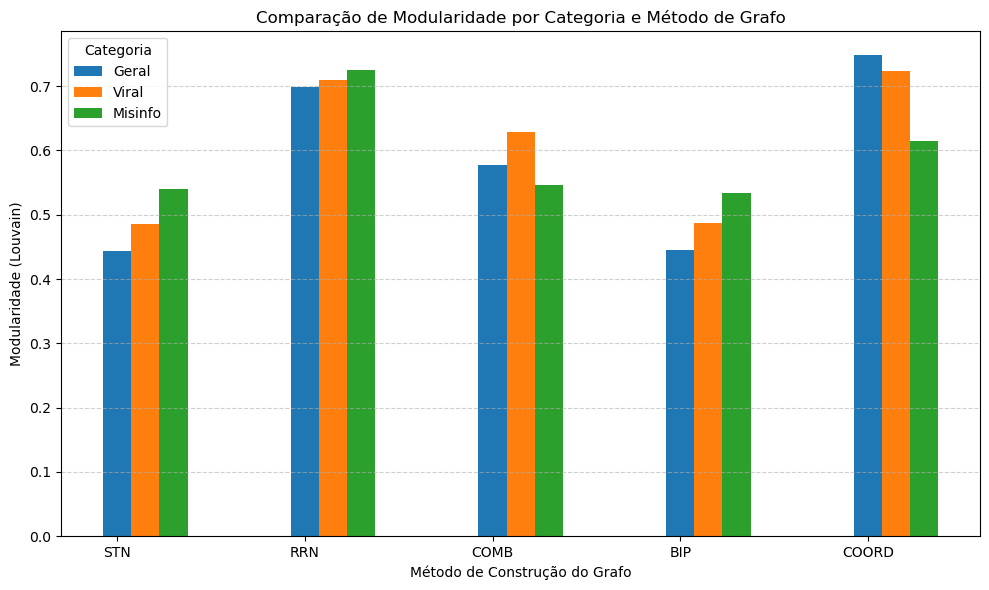

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_modularity_comparison(df_results):
    # Extrai o nome da categoria e do método
    df_results["Categoria"] = df_results["graph"].apply(lambda x: x.split("_")[0])
    df_results["Método"] = df_results["graph"].apply(lambda x: x.split("_")[1])

    # Filtra apenas grafos com valores válidos de modularidade
    df_plot = df_results[df_results["modularity_nx"].notnull()]

    categorias = ["Geral", "Viral", "Misinfo"]
    metodos = ["STN", "RRN", "COMB", "BIP", "COORD"]

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    for i, cat in enumerate(categorias):
        subset = df_plot[df_plot["Categoria"] == cat]
        plt.bar(
            [m + i*0.15 for m in range(len(metodos))],
            subset.set_index("Método").reindex(metodos)["modularity_nx"],
            width=0.15,
            label=cat
        )

    plt.xticks(range(len(metodos)), metodos)
    plt.xlabel("Método de Construção do Grafo")
    plt.ylabel("Modularidade (Louvain)")
    plt.title("Comparação de Modularidade por Categoria e Método de Grafo")
    plt.legend(title="Categoria")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Executa o gráfico
plot_modularity_comparison(df_results)


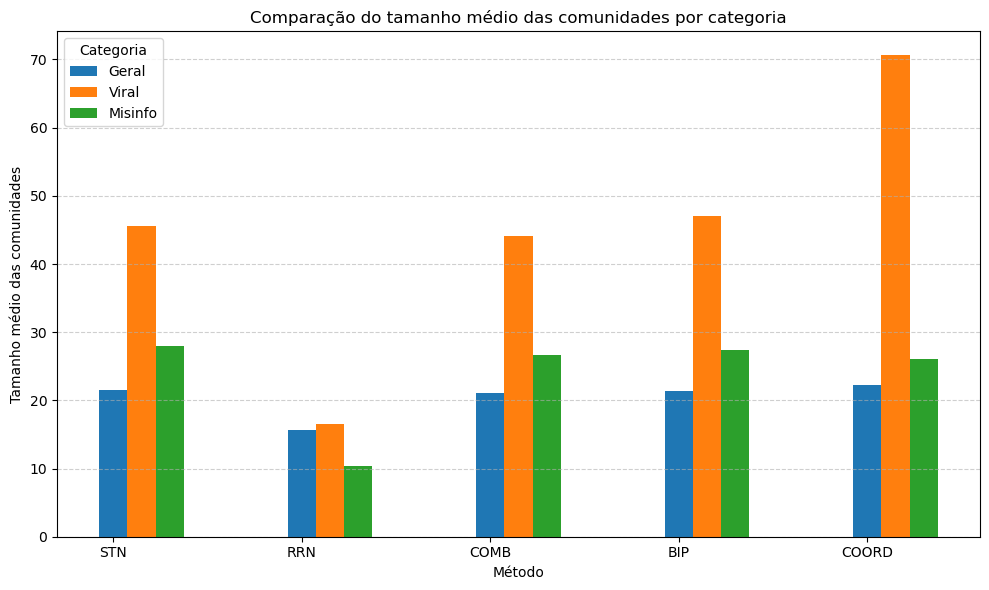

In [48]:
def plot_avg_community_size(df_results):
    df_results["Categoria"] = df_results["graph"].apply(lambda x: x.split("_")[0])
    df_results["Método"] = df_results["graph"].apply(lambda x: x.split("_")[1])
    
    df_plot = df_results[df_results["n_communities"] > 0].copy()
    df_plot["avg_size"] = df_plot["nodes"] / df_plot["n_communities"]
    
    categorias = ["Geral", "Viral", "Misinfo"]
    metodos = ["STN", "RRN", "COMB", "BIP", "COORD"]

    plt.figure(figsize=(10,6))
    for i, cat in enumerate(categorias):
        subset = df_plot[df_plot["Categoria"] == cat]
        plt.bar(
            [m + i*0.15 for m in range(len(metodos))],
            subset.set_index("Método").reindex(metodos)["avg_size"],
            width=0.15,
            label=cat
        )

    plt.xticks(range(len(metodos)), metodos)
    plt.xlabel("Método")
    plt.ylabel("Tamanho médio das comunidades")
    plt.title("Comparação do tamanho médio das comunidades por categoria")
    plt.legend(title="Categoria")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_avg_community_size(df_results)

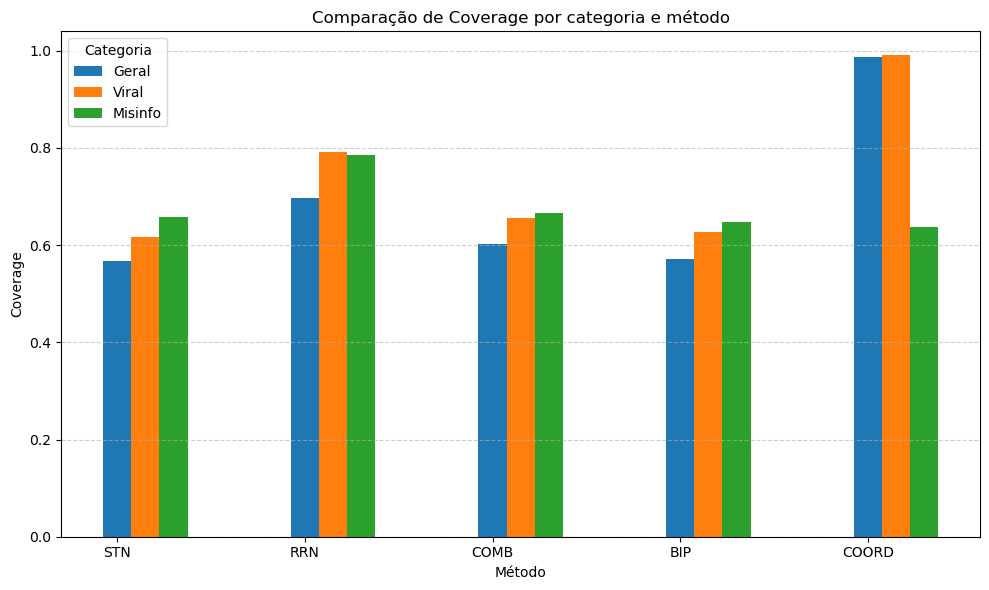

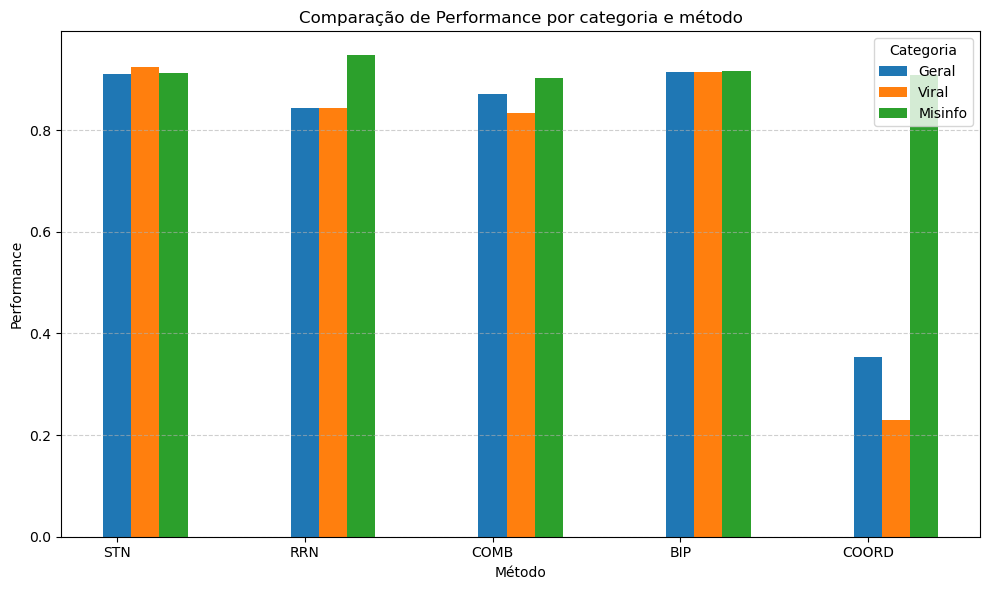

In [49]:
def plot_quality_metrics(df_results):
    df_results["Categoria"] = df_results["graph"].apply(lambda x: x.split("_")[0])
    df_results["Método"] = df_results["graph"].apply(lambda x: x.split("_")[1])

    metodos = ["STN", "RRN", "COMB", "BIP", "COORD"]

    metrics = ["coverage", "performance"]
    for metric in metrics:
        plt.figure(figsize=(10,6))
        for i, cat in enumerate(["Geral", "Viral", "Misinfo"]):
            subset = df_results[df_results["Categoria"] == cat]
            plt.bar(
                [m + i*0.15 for m in range(len(metodos))],
                subset.set_index("Método").reindex(metodos)[metric],
                width=0.15,
                label=cat
            )

        plt.xticks(range(len(metodos)), metodos)
        plt.xlabel("Método")
        plt.ylabel(metric.capitalize())
        plt.title(f"Comparação de {metric.capitalize()} por categoria e método")
        plt.legend(title="Categoria")
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()

plot_quality_metrics(df_results)

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_preview(G, title="Grafo"):
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G, k=0.3)
    nx.draw_networkx_nodes(G, pos, node_size=40, alpha=0.7)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [50]:
G_coord_geral = nx.read_gexf("grafos_gephi/Geral_COORD.gexf")

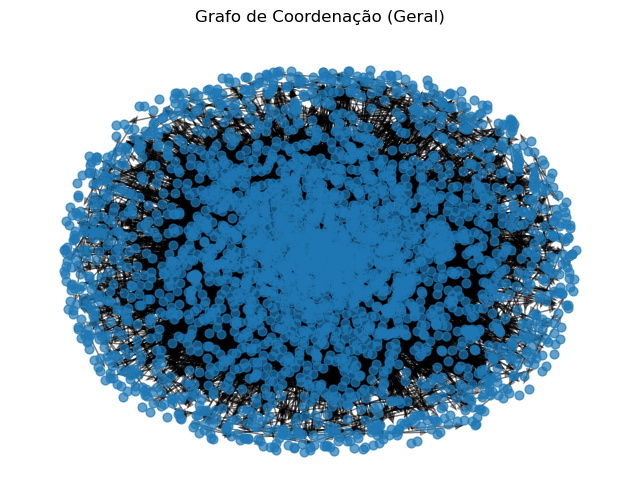

In [51]:
plot_graph_preview(G_coord_geral, "Grafo de Coordenação (Geral)")